In [1]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
embedding_cols = ['tfidf_embedding', 'tfidf_ngrams', 'glove_embedding', 'w2v_embedding', 'bert_embedding']
feature_cols = ['gunning_fog', 'smog_index', 'subjectivity', 'title_text_similarity', 'words_per_sentence',
    'adv_ratio_title', 'noun_ratio_title', 'words_per_title', 'syllables_per_word',
    'uppercase_per_title', 'uppercase_ratio_title_text', 'adj_ratio_text', 'adv_ratio_text',
    'verb_ratio_text', 'noun_ratio_text', 'short_sentences_ratio', 'long_sentences_ratio']
target_col = 'label'
save_dir = "logreg_results"
os.makedirs(save_dir, exist_ok=True)

In [3]:
def embedding_converter(x):
    if pd.isna(x) or x.strip() == '':
        return np.array([])
    x_clean = x.replace('\n', ' ').strip('[]')
    return np.fromstring(x_clean, sep=' ')

def load_data():
    df_train = pd.read_csv('train_embeddings.csv')
    df_val = pd.read_csv('val_embeddings.csv')
    df_test = pd.read_csv('test_embeddings.csv')
    for col in embedding_cols:
        for df in [df_train, df_val, df_test]:
            df[col] = df[col].apply(embedding_converter)
    return df_train, df_val, df_test

In [4]:
def train_logreg_best_model(X_train, y_train, X_val, y_val):
    best_alpha = None
    best_acc = 0
    best_model = None
    for alpha in [1e-4, 1e-3, 1e-2, 1e-1, 1]:
        model = SGDClassifier(loss='log_loss', alpha=alpha, max_iter=1000, random_state=42)
        model.fit(X_train, y_train)
        acc = accuracy_score(y_val, model.predict(X_val))
        if acc > best_acc:
            best_acc = acc
            best_alpha = alpha
            best_model = model
    return best_model, best_alpha, best_acc

In [5]:
def evaluate_final_model(model, X_test, y_test, title_prefix):
    y_pred = model.predict(X_test)
    print(f"\nAccuracy ({title_prefix}): {accuracy_score(y_test, y_pred):.4f}")
    print(f"\nClassification Report ({title_prefix}):")
    print(classification_report(y_test, y_pred, digits=4))
    print(f"\nConfusion Matrix ({title_prefix}):")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix ({title_prefix})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    joblib.dump(model, f"{save_dir}/{title_prefix}_model.pkl")

C:\Users\holte\AppData\Local\Temp\ipykernel_14396\3734616143.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(x_clean, sep=' ')



================== tfidf_embedding (doar embedding) ==================
Best alpha (embedding only): 0.0001 (val acc = 0.5571)

Accuracy (tfidf_embedding_logreg_only): 0.5571

Classification Report (tfidf_embedding_logreg_only):
              precision    recall  f1-score   support

           0     0.5571    1.0000    0.7156      6883
           1     0.0000    0.0000    0.0000      5471

    accuracy                         0.5571     12354
   macro avg     0.2786    0.5000    0.3578     12354
weighted avg     0.3104    0.5571    0.3987     12354


Confusion Matrix (tfidf_embedding_logreg_only):


C:\Users\holte\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\holte\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\holte\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

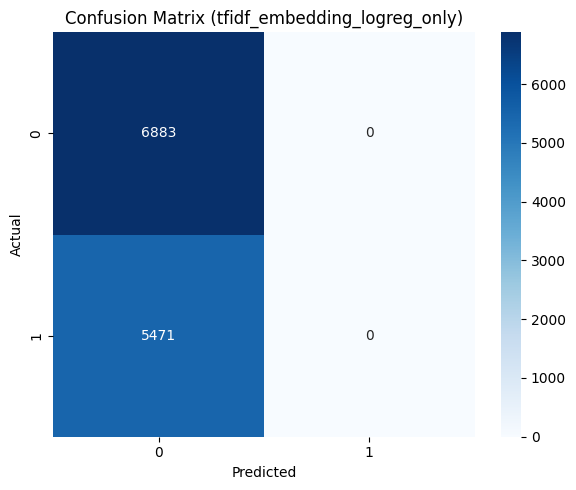


================== tfidf_embedding + features ==================
Best alpha (with features): 0.001 (val acc = 0.8682)

Accuracy (tfidf_embedding_logreg_with_features): 0.8590

Classification Report (tfidf_embedding_logreg_with_features):
              precision    recall  f1-score   support

           0     0.8531    0.9022    0.8770      6883
           1     0.8674    0.8046    0.8348      5471

    accuracy                         0.8590     12354
   macro avg     0.8603    0.8534    0.8559     12354
weighted avg     0.8594    0.8590    0.8583     12354


Confusion Matrix (tfidf_embedding_logreg_with_features):


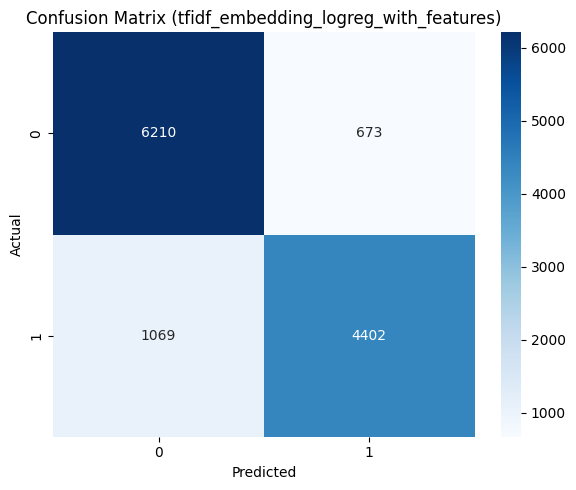


================== tfidf_ngrams (doar embedding) ==================
Best alpha (embedding only): 0.001 (val acc = 0.5590)

Accuracy (tfidf_ngrams_logreg_only): 0.5600

Classification Report (tfidf_ngrams_logreg_only):
              precision    recall  f1-score   support

           0     0.5588    0.9985    0.7166      6883
           1     0.8182    0.0082    0.0163      5471

    accuracy                         0.5600     12354
   macro avg     0.6885    0.5034    0.3664     12354
weighted avg     0.6737    0.5600    0.4065     12354


Confusion Matrix (tfidf_ngrams_logreg_only):


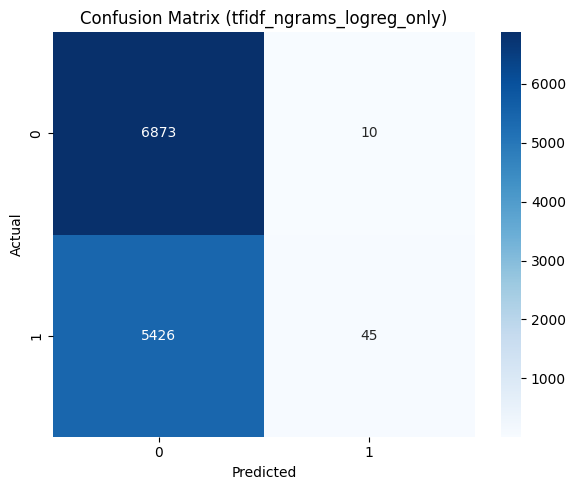


================== tfidf_ngrams + features ==================
Best alpha (with features): 0.001 (val acc = 0.8695)

Accuracy (tfidf_ngrams_logreg_with_features): 0.8582

Classification Report (tfidf_ngrams_logreg_with_features):
              precision    recall  f1-score   support

           0     0.8532    0.9003    0.8761      6883
           1     0.8653    0.8052    0.8341      5471

    accuracy                         0.8582     12354
   macro avg     0.8592    0.8527    0.8551     12354
weighted avg     0.8586    0.8582    0.8575     12354


Confusion Matrix (tfidf_ngrams_logreg_with_features):


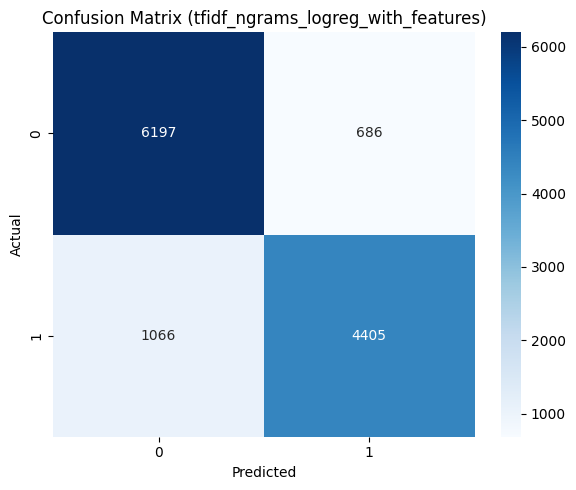


================== glove_embedding (doar embedding) ==================
Best alpha (embedding only): 0.001 (val acc = 0.8446)

Accuracy (glove_embedding_logreg_only): 0.8373

Classification Report (glove_embedding_logreg_only):
              precision    recall  f1-score   support

           0     0.8510    0.8582    0.8546      6883
           1     0.8197    0.8110    0.8153      5471

    accuracy                         0.8373     12354
   macro avg     0.8354    0.8346    0.8350     12354
weighted avg     0.8372    0.8373    0.8372     12354


Confusion Matrix (glove_embedding_logreg_only):


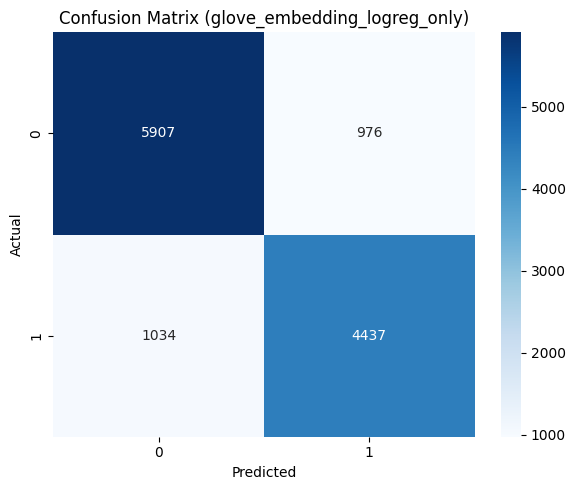


================== glove_embedding + features ==================
Best alpha (with features): 0.0001 (val acc = 0.9183)

Accuracy (glove_embedding_logreg_with_features): 0.9051

Classification Report (glove_embedding_logreg_with_features):
              precision    recall  f1-score   support

           0     0.9104    0.9202    0.9153      6883
           1     0.8983    0.8861    0.8922      5471

    accuracy                         0.9051     12354
   macro avg     0.9044    0.9032    0.9037     12354
weighted avg     0.9051    0.9051    0.9051     12354


Confusion Matrix (glove_embedding_logreg_with_features):


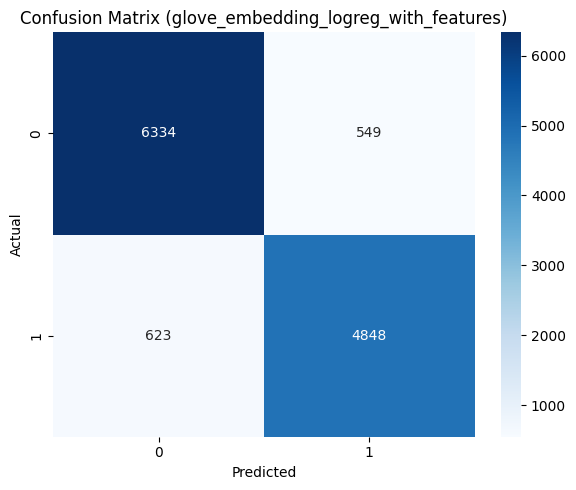


================== w2v_embedding (doar embedding) ==================
Best alpha (embedding only): 0.001 (val acc = 0.8963)

Accuracy (w2v_embedding_logreg_only): 0.8923

Classification Report (w2v_embedding_logreg_only):
              precision    recall  f1-score   support

           0     0.8994    0.9083    0.9039      6883
           1     0.8832    0.8722    0.8777      5471

    accuracy                         0.8923     12354
   macro avg     0.8913    0.8903    0.8908     12354
weighted avg     0.8923    0.8923    0.8923     12354


Confusion Matrix (w2v_embedding_logreg_only):


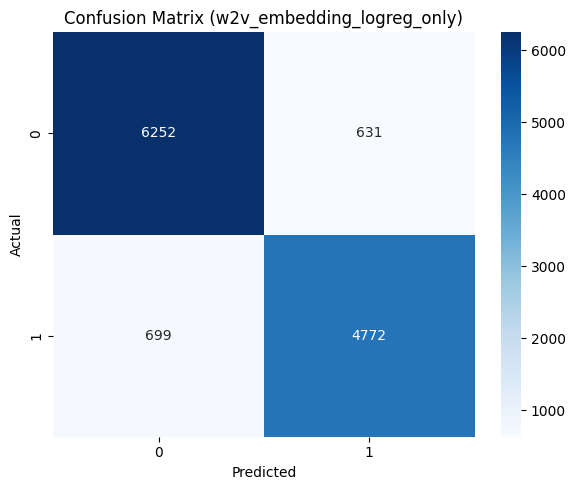


================== w2v_embedding + features ==================
Best alpha (with features): 0.001 (val acc = 0.9419)

Accuracy (w2v_embedding_logreg_with_features): 0.9364

Classification Report (w2v_embedding_logreg_with_features):
              precision    recall  f1-score   support

           0     0.9372    0.9494    0.9433      6883
           1     0.9353    0.9199    0.9276      5471

    accuracy                         0.9364     12354
   macro avg     0.9363    0.9347    0.9354     12354
weighted avg     0.9364    0.9364    0.9363     12354


Confusion Matrix (w2v_embedding_logreg_with_features):


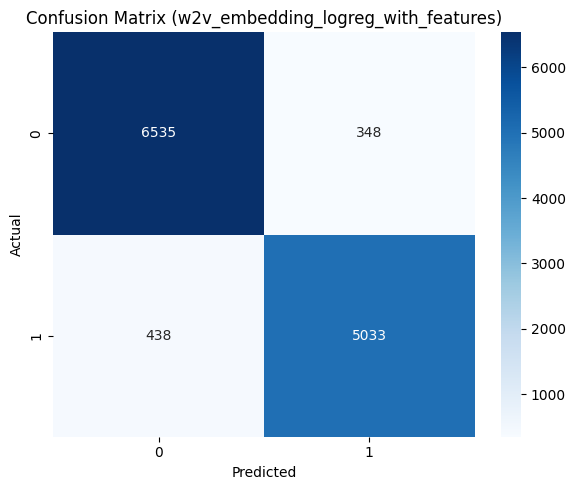


================== bert_embedding (doar embedding) ==================
Best alpha (embedding only): 0.01 (val acc = 0.8984)

Accuracy (bert_embedding_logreg_only): 0.8935

Classification Report (bert_embedding_logreg_only):
              precision    recall  f1-score   support

           0     0.8937    0.9181    0.9057      6883
           1     0.8932    0.8625    0.8776      5471

    accuracy                         0.8935     12354
   macro avg     0.8934    0.8903    0.8917     12354
weighted avg     0.8935    0.8935    0.8933     12354


Confusion Matrix (bert_embedding_logreg_only):


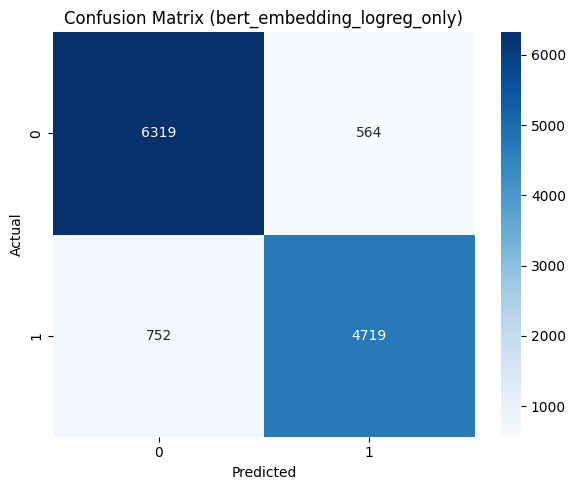


================== bert_embedding + features ==================
Best alpha (with features): 0.001 (val acc = 0.9417)

Accuracy (bert_embedding_logreg_with_features): 0.9337

Classification Report (bert_embedding_logreg_with_features):
              precision    recall  f1-score   support

           0     0.9258    0.9577    0.9415      6883
           1     0.9444    0.9035    0.9235      5471

    accuracy                         0.9337     12354
   macro avg     0.9351    0.9306    0.9325     12354
weighted avg     0.9341    0.9337    0.9335     12354


Confusion Matrix (bert_embedding_logreg_with_features):


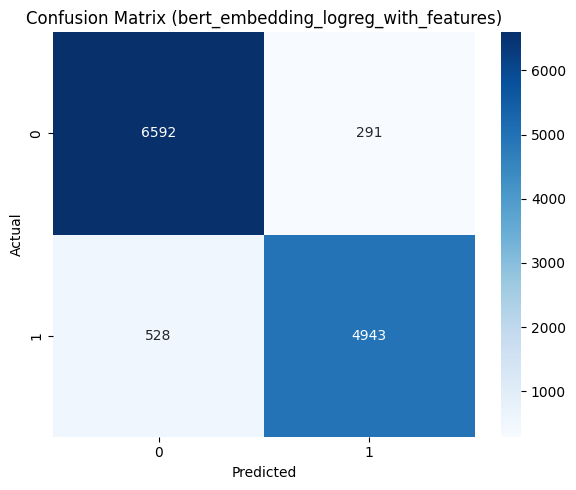

In [6]:
df_train, df_val, df_test = load_data()
y_train = df_train[target_col].values
y_val = df_val[target_col].values
y_test = df_test[target_col].values
X_train_feat = df_train[feature_cols].values
X_val_feat = df_val[feature_cols].values
X_test_feat = df_test[feature_cols].values

for col in embedding_cols:
    print(f"\n================== {col} (doar embedding) ==================")
    X_train_emb = np.vstack(df_train[col].values)
    X_val_emb = np.vstack(df_val[col].values)
    X_test_emb = np.vstack(df_test[col].values)

    scaler_emb = StandardScaler()
    X_train_emb_std = scaler_emb.fit_transform(X_train_emb)
    X_val_emb_std = scaler_emb.transform(X_val_emb)
    X_test_emb_std = scaler_emb.transform(X_test_emb)

    model_emb, best_alpha_emb, best_acc_emb = train_logreg_best_model(X_train_emb_std, y_train, X_val_emb_std, y_val)
    print(f"Best alpha (embedding only): {best_alpha_emb} (val acc = {best_acc_emb:.4f})")
    evaluate_final_model(model_emb, X_test_emb_std, y_test, f"{col}_logreg_only")

    print(f"\n================== {col} + features ==================")
    X_train_comb = np.hstack([X_train_feat, X_train_emb])
    X_val_comb = np.hstack([X_val_feat, X_val_emb])
    X_test_comb = np.hstack([X_test_feat, X_test_emb])

    scaler_comb = StandardScaler()
    X_train_comb_std = scaler_comb.fit_transform(X_train_comb)
    X_val_comb_std = scaler_comb.transform(X_val_comb)
    X_test_comb_std = scaler_comb.transform(X_test_comb)

    model_comb, best_alpha_comb, best_acc_comb = train_logreg_best_model(X_train_comb_std, y_train, X_val_comb_std, y_val)
    print(f"Best alpha (with features): {best_alpha_comb} (val acc = {best_acc_comb:.4f})")
    evaluate_final_model(model_comb, X_test_comb_std, y_test, f"{col}_logreg_with_features")
